<a href="https://colab.research.google.com/github/Cedrik-Black/Data_science/blob/master/exercises/231_240_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science Bootcamp

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 231](#1)
* [Ćwiczenie 232](#2)
* [Ćwiczenie 233](#3)
* [Ćwiczenie 234](#4)
* [Ćwiczenie 235](#5)
* [Ćwiczenie 236](#6)
* [Ćwiczenie 237](#7)
* [Ćwiczenie 238](#8)
* [Ćwiczenie 239](#9)
* [Ćwiczenie 240](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd

np.__version__

'1.25.2'

### <a name='1'></a> Ćwiczenie 231
Zaimportuj bibliotekę _tensorflow_ w wersji 2.x.

In [2]:
%tensorflow_version 2.x
import tensorflow as tf

tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

Załaduj dane Fashion MNIST wykorzystując bibliotekę _tensorflow_. Odpowiednio zbiór treningowy (_X\_train_, _y\_train_) oraz testowy (_X\_test_, _y\_test_).

In [23]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

Sprawdź rozmiar zbiorów treningowych i testowych.

In [24]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


### <a name='2'></a> Ćwiczenie 232
Wykorzytując bibliotekę _matplotlib_ wyświetl obraz ze zbioru treningowego z indeksem 40.

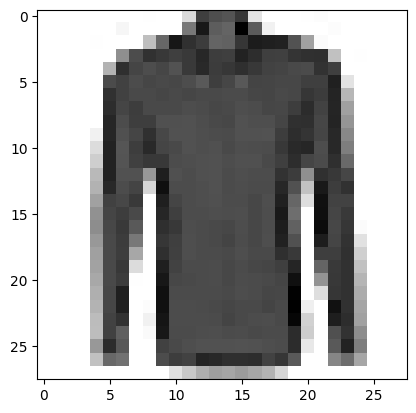

In [25]:
import matplotlib.pyplot as plt

plt.imshow(X_train[40], cmap='gray_r')

Wyświetl numer klasy dla próbki ze zbioru treningowego z ineksem 40.

In [26]:
y_train[40]

6

### <a name='3'></a> Ćwiczenie 233
Wystandaryzuj dane. Podziel wartości tablic _X\_train_ oraz _X\_test_ przez wartość 255.0.

In [27]:
X_train = X_train / 255.
X_test = X_test / 255.

### <a name='4'></a> Ćwiczenie 234
Zaimportuj klasę _Sequential_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [28]:
from tensorflow.keras.models import Sequential

Zaimportuj warstwy _Flatten_ oraz _Dense_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [29]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

### <a name='5'></a> Ćwiczenie 235
Zbuduj model klasy _Sequential_.

In [30]:
model = Sequential()

Dodaj pierwszą warstwę typu _Flatten_ wraz z odpowiednio dobranym parametrem _input_shape_.

In [31]:
model.add(Flatten(input_shape=(28, 28)))

Dodaj kolejną warstwę typu _Dense_ z 128 neuronami i funkcją aktywacji _relu_.

In [32]:
model.add(Dense(units=128, activation='relu'))

Dodaj ostatnią warstwę typu _Dense_ z 10 neuronami i funkcją aktywacji _softmax_.

In [33]:
model.add(Dense(units=10, activation='softmax'))

Wyświetl podsumowanie modelu.

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### <a name='6'></a> Ćwiczenie 236
Skompiluj model. Wykorzystaj optymalizator _rmsprop_, funkcję straty _sparse_categorical_crossentropy_ oraz metrykę _accuracy_.

In [35]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### <a name='7'></a> Ćwiczenie 237
Dopasuj model do danych treningowych, ustawiając 10 epok oraz podział na zbiór walidacyjny wynoszący 0.2.

In [36]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5233 - accuracy: 0.8152 - val_loss: 0.4168 - val_accuracy: 0.8477
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3882 - accuracy: 0.8599 - val_loss: 0.4060 - val_accuracy: 0.8562
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3509 - accuracy: 0.8730 - val_loss: 0.3588 - val_accuracy: 0.8744
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3309 - accuracy: 0.8805 - val_loss: 0.3639 - val_accuracy: 0.8783
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3132 - accuracy: 0.8876 - val_loss: 0.3563 - val_accuracy: 0.8853
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3026 - accuracy: 0.8909 - val_loss: 0.3475 - val_accuracy: 0.8804
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2926 - accuracy: 0.8971 - val_loss: 0.3902 - val_accuracy:

### <a name='8'></a> Ćwiczenie 238
Dokonaj predykcji modelu na podstawie danych testowych.

In [55]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

313/313 [==============================] - 1s 4ms/step


Zbuduj macierz konfuzji (macierz pomyłek).

In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[852,   1,  15,  19,   7,   2,  96,   1,   7,   0],
       [  2, 974,   1,  17,   5,   0,   1,   0,   0,   0],
       [ 17,   0, 780,  21, 114,   1,  64,   0,   3,   0],
       [ 19,  10,   8, 911,  27,   0,  19,   0,   6,   0],
       [  1,   0,  73,  40, 834,   1,  47,   0,   4,   0],
       [  1,   0,   0,   0,   0, 947,   0,  36,   1,  15],
       [131,   2,  75,  57,  87,   0, 638,   0,  10,   0],
       [  0,   0,   0,   0,   0,   8,   0, 980,   0,  12],
       [  2,   1,   3,   5,   4,   1,   4,   4, 976,   0],
       [  0,   0,   0,   0,   0,  13,   1,  50,   0, 936]])

### <a name='9'></a> Ćwiczenie 239
Zbuduj obiekt pandas _DataFrame_ zawierający predykcje modelu. Nadaj nazwę kolumny _prediction_ i przypisz do zmiennej _results_.

In [57]:
results = pd.DataFrame(y_pred, columns=['prediction'])
results

,prediction
0,9
1,2
2,1
3,1
4,6
...,...
9995,9
9996,1
9997,8
9998,1


Przypisz nową kolumnę z wartościami ze zmiennej _y\_test_ i nazwij ją _y\_test_.

In [58]:
results['y_test'] = y_test
results

,prediction,y_test
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


Przypisz nową kolumnę o nazwie _is_misclassified_, która zwróci 1, gdy próbki zostaną błędnie sklasyfikowane, w przeciwnym przypadku 0.

In [59]:
results['is_misclassified'] = (results['prediction'] != results['y_test']).astype('int')
results

,prediction,y_test,is_misclassified
0,9,9,0
1,2,2,0
2,1,1,0
3,1,1,0
4,6,6,0
...,...,...,...
9995,9,9,0
9996,1,1,0
9997,8,8,0
9998,1,1,0


### <a name='10'></a> Ćwiczenie 240
Zapisz obiekt _results_ do pliku _results.csv_.

In [60]:
results.to_csv('results.csv', index=False)

In [61]:
!head results.csv

prediction,y_test,is_misclassified
9,9,0
2,2,0
1,1,0
1,1,0
6,6,0
1,1,0
4,4,0
6,6,0
5,5,0
